In [175]:
import matplotlib.pyplot as plt
import numpy as np

## Input points

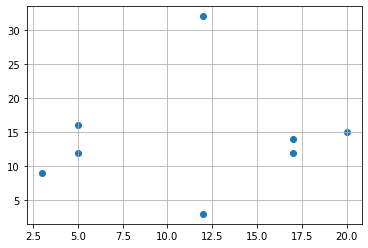

In [176]:
points = np.array([ [17,12],[5,12],[17,14],[5,16],[20,15],[3,9],[12,3],[12,32]])
plt.figure('Draw')
plt.scatter(points[:,0],points[:,1]) 
plt.draw()
plt.grid(True)
plt.pause(5)  # 5 seconds
plt.savefig("easyplot.jpg")
plt.close()

In [178]:
def distance(point_a, point_b):
    distance_x = abs(point_a[0] - point_b[0])
    distance_y = abs(point_a[1] - point_b[1])
    distance = np.sqrt(np.square(distance_x)+np.square(distance_y))
    return distance

In [179]:
def k_means_clustering(all_points, center_points):
    num_points=all_points.shape[0]
    num_centers=center_points.shape[0]
    
    clustered_orders = []
    for c in range(num_centers):
        clustered_orders.append([])
    
    for p in range(num_points):
        distance_center = 9999999;
        order_center = 0;
        for c in range(num_centers):
            distance_temp = distance(all_points[p], center_points[c]);
            if(distance_temp<distance_center):
                distance_center=distance_temp;
                order_center=c;
        clustered_orders[order_center].append(p)
    
    return clustered_orders

In [229]:
def calculate_centers(clustered_orders):
    res = []    
    for i in range(len(clustered_orders)):
        res.append([])
    for c in range(len(clustered_orders)):
        sum_x=0
        sum_y=0
        points_temp=points[clustered_orders[c]]
        res[c]=np.mean(points_temp,axis=0).tolist()
    return np.array(res)

In [269]:
def test_center(center_points):
    flag=True
    i=0;
    while(flag):
        clustered_orders = k_means_clustering(points, center_points)
        center_points_new = calculate_centers(clustered_orders)
        i=i+1
        print('===== After %d iter====='%(i))
        print(clustered_orders)
        print(center_points)
        print(center_points_new)        
        if((center_points==center_points_new).all()):
            flag=False;
        else:
            center_points = center_points_new

In [270]:
center_points = np.array([[12,3],[12,32]])

test_center(center_points)

===== After 1 iter=====
[[0, 1, 2, 3, 4, 5, 6], [7]]
[[12  3]
 [12 32]]
[[11.28571429 11.57142857]
 [12.         32.        ]]
===== After 2 iter=====
[[0, 1, 2, 3, 4, 5, 6], [7]]
[[11.28571429 11.57142857]
 [12.         32.        ]]
[[11.28571429 11.57142857]
 [12.         32.        ]]


In [271]:
center_points = np.array([[5,12],[17,12]])

test_center(center_points)

===== After 1 iter=====
[[1, 3, 5], [0, 2, 4, 6, 7]]
[[ 5 12]
 [17 12]]
[[ 4.33333333 12.33333333]
 [15.6        15.2       ]]
===== After 2 iter=====
[[1, 3, 5, 6], [0, 2, 4, 7]]
[[ 4.33333333 12.33333333]
 [15.6        15.2       ]]
[[ 6.25 10.  ]
 [16.5  18.25]]
===== After 3 iter=====
[[1, 3, 5, 6], [0, 2, 4, 7]]
[[ 6.25 10.  ]
 [16.5  18.25]]
[[ 6.25 10.  ]
 [16.5  18.25]]


In [272]:
center_points = np.array([[12,3],[12,32],[5,12]])

test_center(center_points)

===== After 1 iter=====
[[0, 2, 4, 6], [7], [1, 3, 5]]
[[12  3]
 [12 32]
 [ 5 12]]
[[16.5        11.        ]
 [12.         32.        ]
 [ 4.33333333 12.33333333]]
===== After 2 iter=====
[[0, 2, 4, 6], [7], [1, 3, 5]]
[[16.5        11.        ]
 [12.         32.        ]
 [ 4.33333333 12.33333333]]
[[16.5        11.        ]
 [12.         32.        ]
 [ 4.33333333 12.33333333]]


In [273]:
center_points = np.array([[12,3],[12,32],[5,12],[17,12]])

test_center(center_points)

===== After 1 iter=====
[[6], [7], [1, 3, 5], [0, 2, 4]]
[[12  3]
 [12 32]
 [ 5 12]
 [17 12]]
[[12.          3.        ]
 [12.         32.        ]
 [ 4.33333333 12.33333333]
 [18.         13.66666667]]
===== After 2 iter=====
[[6], [7], [1, 3, 5], [0, 2, 4]]
[[12.          3.        ]
 [12.         32.        ]
 [ 4.33333333 12.33333333]
 [18.         13.66666667]]
[[12.          3.        ]
 [12.         32.        ]
 [ 4.33333333 12.33333333]
 [18.         13.66666667]]
